In [ ]:
import matplotlib.pyplot as plt
import random as rnd

In [72]:
class Agent:
    def __init__(self,id,strength=0.5):
        self.id = id
        self.strength = strength
        
def experiment(stress):        
    count=[]
    for i in range(10):
        count.append([])
    a_list=[Agent(i,i/10) for i in range(1,10)]
    world=[a_list[rnd.randint(0,8)] for _ in range(1000)]
    for x in range(1000):
        nworld =[]
        while len(world) >0:   
            win = None
            a = world.pop(0)
            b = world.pop(0)
            if rnd.random()<stress:#rnd.random():
                if a!=None:
                    if rnd.random()<a.strength:
                        a=None
                if b!=None:
                    if rnd.random()<b.strength:
                        b=None
            if (a != None) and (b!=None):
                if rnd.random()*(a.strength+b.strength)<=a.strength:
                    win = a
                else:
                    win =b
            if a==None:
                win = b
            if b==None:
                win = a
            if rnd.random()<0.001:
                win = a_list[rnd.randint(0,8)]

            nworld.append(win)
            nworld.append(None)

        rnd.shuffle(nworld)
        for i in range(len(nworld)):
            if nworld[i] == None:
                if rnd.random()>stress:
                    nworld[i] = rnd.choice(nworld)
        for i in range(len(count)):
            counter=0
            for n in nworld:
                if n!=None:
                    if n.id==i:
                        counter+=1
            count[i].append(counter)  
        world = nworld
    for i in range(1,10):
        plt.plot(count[i])
    plt.show()

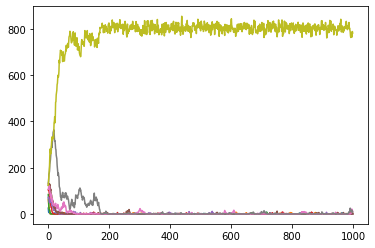

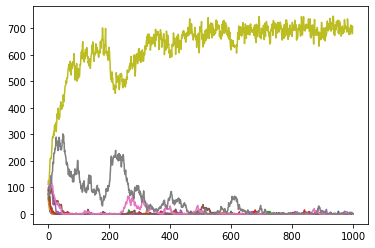

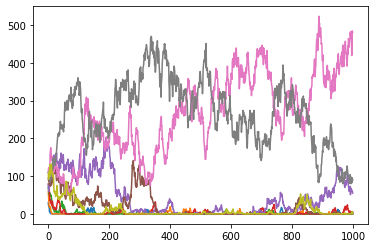

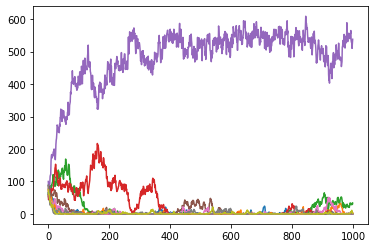

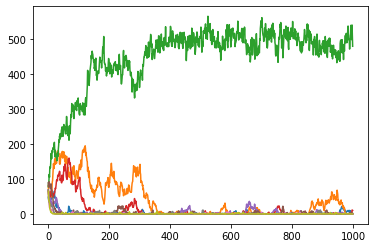

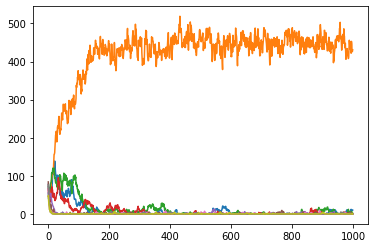

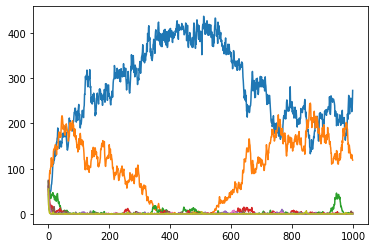

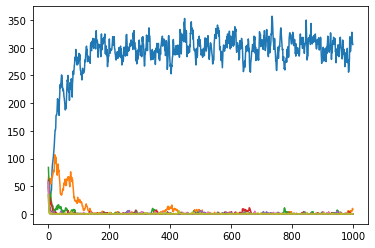

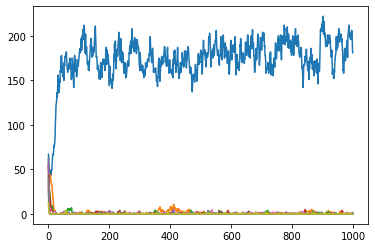

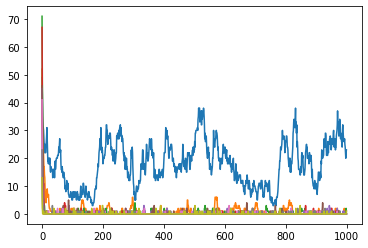

In [73]:
for i in range(0,10):
    experiment(i/10)
    